# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import random
import numpy as np
import matplotlib
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [8]:
# your code here
values = random.choices(range(1,7),k=10)
result = pd.DataFrame(values, columns=['value'])

# dice = pd.DataFrame(range(1,11), columns=['dice'])
# result = pd.concat([result, dice],axis=1)

print(result)

   value
0      6
1      1
2      3
3      6
4      1
5      2
6      1
7      5
8      1
9      2


#### 2.- Plot the results sorted by value.

In [9]:
# your code here
print(result.sort_values('value', ascending= True))


   value
1      1
4      1
6      1
8      1
5      2
9      2
2      3
7      5
0      6
3      6


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

AxesSubplot(0.125,0.125;0.775x0.755)


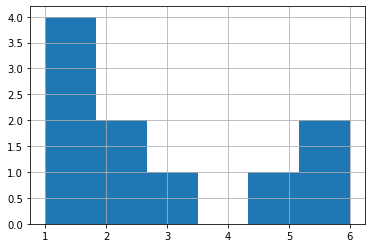

In [10]:
# your code here
print(result['value'].hist(bins=6))

In [ ]:
"""
You can see the frequency of the numbers that have been rolled with the dice. 
For example, the number 1 has been rolled 4 times.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [11]:
# your code here
def Mean(data):
    mean_obsv = sum(data)/len(data)
    return mean_obsv
result.apply(Mean)


value    2.8
dtype: float64

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [51]:
# your code here

#Find the frequency distribution
count_obsv = result['value'].value_counts()
count_obsv = pd.DataFrame(count_obsv, columns=['value']).reset_index()
print("The frequency distribution is:", count_obsv)

# Calculate the sum of frequencies
total = []
for i in range(len(count_obsv)):
    number = count_obsv['index'][i]*count_obsv['value'][i]
    total.append(number)

# Calculate the total sum of all frequencies                 
sum_obsv1 = sum(total)
print("The total sum of all frequencies  is:", sum_obsv1)

# Calculate mean
mean_obsv1 = sum_obsv1/len(result)
print("The mean is:", mean_obsv1)

The frequency distribution is:    index  value
0      1      4
1      6      2
2      2      2
3      5      1
4      3      1
The total sum of all frequencies  is: 28
The mean is: 2.8


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [37]:
# your code here

def Median(data):
    # Median is the middle number. 

    # First we sort the list of all observations
    data.sort()

    # We check the lenght of the list
    length = len(data)

    # Then we look for the position of the median
    if len(data) % 2 == 0:
        median1 = data[length // 2]
        median2 = data[length // 2 -1]
        median = (median1+median2)/2
    else:
        median = data[length // 2]

    # Now we find the median
    return median

Median(values)

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [46]:
def quartiles(data):
    # First we sort the list of all observations
    data.sort()
    
    # We divide the data into two halves (excluding the median)
    middle = len(data) // 2 
    
    # Then we look for the position of the median
    if (len(data) % 2 == 0):# even
        Q1 = Median(data[:middle])
        Q3 = Median(data[middle:])
    else:# odd
        Q1 = Median(data[:middle])  # same as even
        Q3 = Median(data[middle+1:])
    return print("Q1:",Q1,"\nQ2:",int(Median(data)),"\nQ3:",Q3,"\nQ4:",max(data))

quartiles(values)

Q1: 1 
Q2: 2 
Q3: 5 
Q4: 6


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

    roll  value
0      0      1
1      1      2
2      2      6
3      3      1
4      4      6
..   ...    ...
95    95      4
96    96      6
97    97      1
98    98      3
99    99      6

[100 rows x 2 columns]
AxesSubplot(0.125,0.125;0.775x0.755)


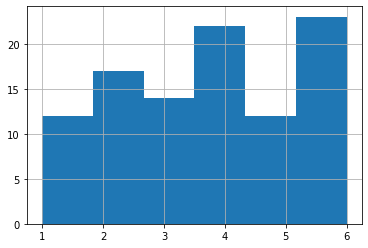

In [47]:
# your code here
dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice_hundred = dice_hundred.drop(['Unnamed: 0'], axis=1)
print(dice_hundred)
print(dice_hundred["value"].hist(bins = 6))


In [48]:
"""
It looks like it is quite equally divided, but 6 and 4 have been rolled the most. 
"""

'\nIt looks like it is quite equally divided, but 6 and 4 have been rolled the most. \n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [49]:
# your code here
# dice_hundred['value'].mean()
dice_hundred.apply(Mean)


roll     49.50
value     3.74
dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [56]:
# your code here
count = dice_hundred['value'].value_counts()
freqdistr = pd.DataFrame(count, columns=['value']).reset_index()
print("The frequency distribution is:", freqdistr)

The frequency distribution is:    index  value
0      6     23
1      4     22
2      2     17
3      3     14
4      5     12
5      1     12


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x11baf9650>


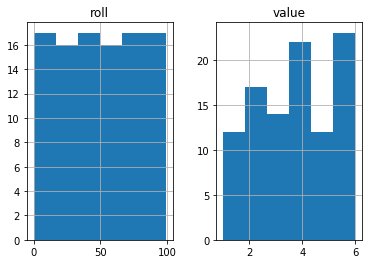

In [58]:
# your code here
print(dice_hundred.hist(bins=6))

In [ ]:
"""
Well the mean is 3.74 so that seems to be in the histogram too.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

[[<matplotlib.axes._subplots.AxesSubplot object at 0x11be84a10>


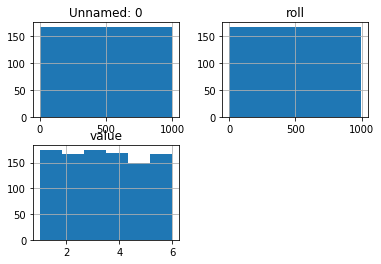

In [60]:
# your code here
dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')
print(dice_thousand.hist(bins=6))

In [ ]:
"""
The frequency here is almost equal to each other, so it seems the data is very spread out.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

[[<matplotlib.axes._subplots.AxesSubplot object at 0x11c03a350>]]


'\nThe mean will probably be between 34 and 41\n'

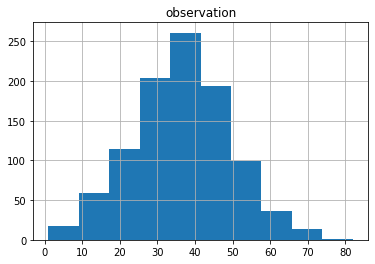

In [61]:
# your code here
ages_pop = pd.read_csv('../data/ages_population.csv')
print(ages_pop.hist())

"""
The mean will probably be between 34 and 41
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [62]:
# your code here
print("Mean is:", ages_pop.mean())
print("Std is:", ages_pop.std())

Mean is: observation    36.56
dtype: float64
Std is: observation    12.8165
dtype: float64


In [ ]:
"""
Yes it was in the range
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x11c13e450>]]


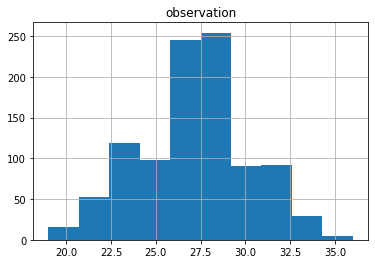

In [63]:
# your code here
ages_pop2 = pd.read_csv('../data/ages_population2.csv')
print(ages_pop2.hist())

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Yes it looks less normally distributed as the variance is less. 
There are more values in the middle (so closer to mean)
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [64]:
# your code here
print("Mean is:",ages_pop2.mean())
print("Stdev is:",ages_pop2.std())

Mean is: observation    27.155
dtype: float64
Stdev is: observation    2.969814
dtype: float64


In [ ]:
"""
The mean is lower in pop2, and the stdev is smaller. This is
as expected because the variety seems to be lower in pop2 compared
to pop
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x11c12b450>]]


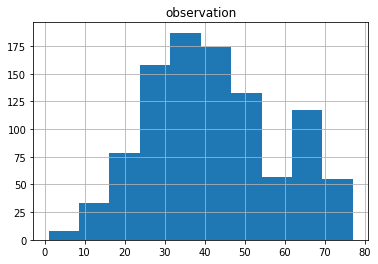

In [65]:
# your code here
ages_pop3 = pd.read_csv('../data/ages_population3.csv')
print(ages_pop3.hist())

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [66]:
# your code here
print("Mean is:",ages_pop3.mean())
print("Standard deviation is:",ages_pop3.std())

Mean is: observation    41.989
dtype: float64
Standard deviation is: observation    16.144706
dtype: float64


In [ ]:
"""
The mean is higher and the stdv is higher. This is expected because
in the histogram you can see that the data is less normaly distributed
and has two peaks around 35 and around 65
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [67]:
# your code here
print("First quartile is:", ages_pop3.quantile(.25))
print("Second quartile is:", ages_pop3.quantile(.50))
print("Third quartile is:", ages_pop3.quantile(.75))
print("Fourth quartile is:", ages_pop3.quantile(1))

First quartile is: observation    30.0
Name: 0.25, dtype: float64
Second quartile is: observation    40.0
Name: 0.5, dtype: float64
Third quartile is: observation    53.0
Name: 0.75, dtype: float64
Fourth quartile is: observation    77.0
Name: 1, dtype: float64


In [ ]:
"""
The second quartile (the median) is almost the same as the mean.

You can also see the second peak in the in relatively
big jumps in the range between the third (53) and the 
fourth quartile (77) 
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""